In [2]:
from sklearn.datasets import load_digits

mnist = load_digits()

mnist['images'].shape

In [7]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

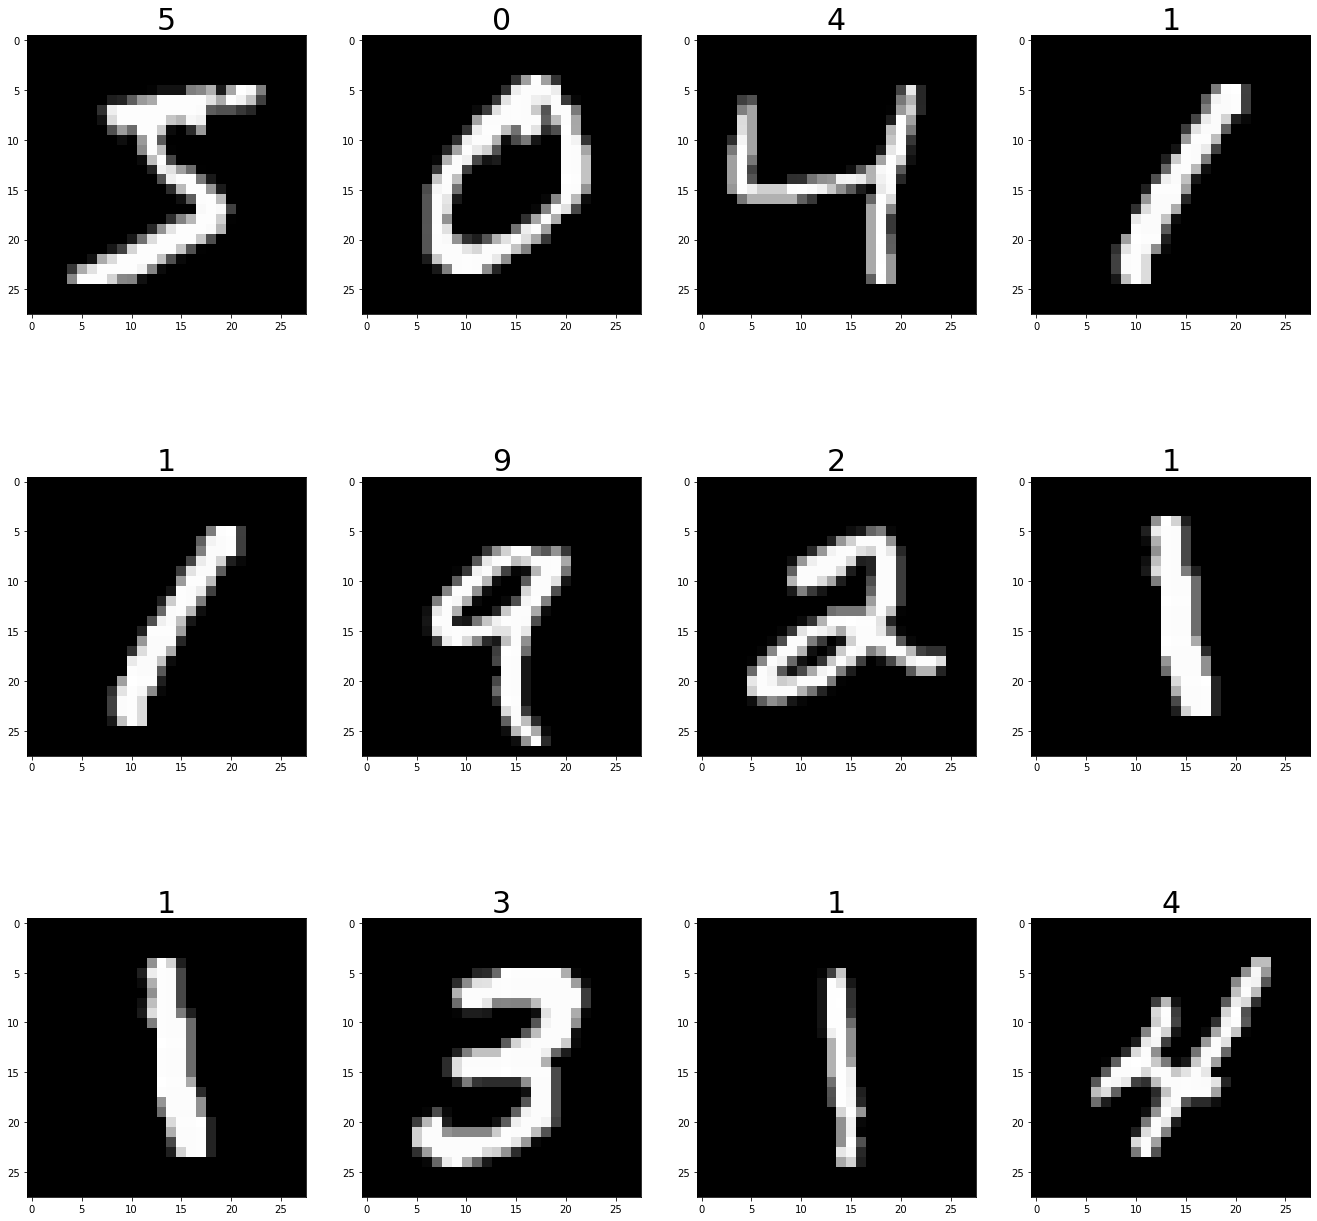

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

no_examples = 10
columns = 4
rows = ceil(no_examples/columns)

fig, axs = plt.subplots(rows, columns, figsize=((23,23)))

for i in range(rows):
    for j in range(columns):
        example = (np.array(X[i*rows+j], dtype='uint8').reshape((28,28)), y[i*rows+j])
        axs[i][j].imshow(example[0], cmap='gray')
        axs[i][j].set_title(example[1], fontsize=30)
